In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.metrics import roc_curve

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
data=pd.read_csv("/Users/swatilathwal/Documents/data mining/Project/PHY_TRAIN.csv")

In [5]:
#data exploration
data

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
2,3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
3,4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49996,49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662
49998,49999,1,0.000000,0.000000,0.000000,0,0.855551,0.0,-0.849437,1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 80 columns):
exampleid    50000 non-null int64
target       50000 non-null int64
feat1        50000 non-null float64
feat2        50000 non-null float64
feat3        50000 non-null float64
feat4        50000 non-null int64
feat5        50000 non-null float64
feat6        50000 non-null float64
feat7        50000 non-null float64
feat8        50000 non-null int64
feat9        50000 non-null float64
feat10       50000 non-null float64
feat11       50000 non-null float64
feat12       50000 non-null int64
feat13       50000 non-null float64
feat14       50000 non-null float64
feat15       50000 non-null float64
feat16       50000 non-null int64
feat17       50000 non-null int64
feat18       50000 non-null float64
feat19       50000 non-null float64
feat20       15798 non-null float64
feat21       15798 non-null float64
feat22       15798 non-null float64
feat23       50000 non-null float64
feat2

In [7]:
data.feat78.skew() 

3.2238821135809186

In [8]:
colum_names= data.columns

In [9]:
data.isnull().values.any()

True

In [10]:
missing_col=data.columns[data.isnull().any()]

In [11]:
missing_col

Index(['feat20', 'feat21', 'feat22', 'feat29', 'feat44', 'feat45', 'feat46',
       'feat55'],
      dtype='object')

In [12]:
#missing_per=[]
#for i in range (len('missing_col')):
percent_missing = data.feat55.isnull().sum() * 100 / len(data.feat55)
   # missing_per.append(percent_missing);
#missing_per
percent_missing

37.204

In [13]:
data.describe()

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.497220,0.155606,0.084876,-0.050354,-0.000060,0.126569,0.049887,-0.038344,0.002860,...,0.008120,0.000478,0.003198,0.052807,0.066944,-0.014101,-0.001460,0.094480,0.002843,0.066545
std,14433.901067,0.499997,0.414875,0.295335,0.253748,0.392916,0.400694,0.223713,0.214168,0.322077,...,0.769302,0.446978,0.381329,0.180710,0.283114,0.176896,0.295939,0.315841,0.019081,0.223091
min,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-0.999998,-0.908001,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,12500.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.000013,-0.001582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000015,0.003002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50000.000000,1.000000,2.639020,3.429590,0.999954,1.000000,2.719006,3.054644,0.999274,1.000000,...,1.000000,0.999999,0.907744,0.999953,3.429590,0.999869,1.000000,3.000000,0.385513,1.000000


In [14]:
missing_indicators = data[missing_col].isnull().astype(int).add_suffix('_M')

In [15]:
missing_indicators.isnull().any()

feat20_M    False
feat21_M    False
feat22_M    False
feat29_M    False
feat44_M    False
feat45_M    False
feat46_M    False
feat55_M    False
dtype: bool

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [17]:
imp.fit(data)
data= imp.transform(data)

In [18]:
data = pd.DataFrame(data,columns=colum_names)

In [19]:
data.isnull().values.any()

False

In [20]:
result = pd.concat([data, missing_indicators], axis=1)

In [21]:
result

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat77,feat78,feat20_M,feat21_M,feat22_M,feat29_M,feat44_M,feat45_M,feat46_M,feat55_M
0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1,1,1,1,0,0,0,1
1,2.0,0.0,0.920167,0.817883,-0.646473,-1.0,0.000000,0.0,0.000000,0.0,...,0.302235,0.950770,0,0,0,1,1,1,1,1
2,3.0,1.0,0.868397,0.178202,0.150828,-1.0,0.000000,0.0,0.000000,0.0,...,0.001421,0.882853,0,0,0,1,0,0,0,1
3,4.0,0.0,0.000000,0.000000,0.000000,0.0,1.577894,0.0,-0.369792,-1.0,...,0.000000,0.000000,1,1,1,0,0,0,0,0
4,5.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1,1,1,0,0,0,0,0
49996,49997.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1,1,1,0,0,0,0,0
49997,49998.0,1.0,0.918590,1.012605,-0.047045,-1.0,0.000000,0.0,0.000000,0.0,...,0.014583,0.850662,0,0,0,0,0,0,0,0
49998,49999.0,1.0,0.000000,0.000000,0.000000,0.0,0.855551,0.0,-0.849437,1.0,...,0.000000,0.000000,1,1,1,0,0,0,0,0


In [22]:
imp_feature =['feat4','feat8','feat12','feat13','feat14','feat15','feat20','feat31','feat56','feat63','feat66','feat69','feat70','feat71','feat75','target']
fdata=data[imp_feature]


In [23]:
fdata.columns

Index(['feat4', 'feat8', 'feat12', 'feat13', 'feat14', 'feat15', 'feat20',
       'feat31', 'feat56', 'feat63', 'feat66', 'feat69', 'feat70', 'feat71',
       'feat75', 'target'],
      dtype='object')

In [24]:
fdata

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75,target
0,0.0,0.0,-1.0,0.159424,-0.036906,7.133022e-07,0.001118,1.0,1.0,0.0,-1.0,-1.0,-0.036906,-0.000724,0.0,0.0
1,-1.0,0.0,-1.0,-0.999927,-0.010512,1.751311e-04,-0.920167,-1.0,1.0,5.0,1.0,-1.0,-0.999927,-0.012102,-1.0,0.0
2,-1.0,0.0,1.0,0.908824,0.843792,-9.441804e-02,0.773496,-1.0,-1.0,0.0,-1.0,1.0,0.908824,0.550843,-1.0,1.0
3,0.0,-1.0,1.0,0.007575,-0.004903,-2.879200e-05,0.001118,0.0,0.0,0.0,-1.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,-1.0,-0.000242,-0.000010,7.833703e-06,0.001118,-1.0,0.0,0.0,-1.0,1.0,0.000005,0.400702,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,-1.0,-0.976982,0.004464,1.160270e-05,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0
49996,0.0,0.0,-1.0,0.024763,0.001418,-6.377560e-04,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0
49997,-1.0,0.0,1.0,0.961641,0.040291,-9.958344e-03,1.982100,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,-1.0,1.0
49998,0.0,1.0,-1.0,0.999904,0.000634,-1.963700e-05,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [26]:
target_col_name = 'target'
feature_target_corr = {}
for col in fdata:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = pearsonr(fdata[col], fdata[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'feat4_target': 0.1298520511787265, 'feat8_target': 0.14964452160511965, 'feat12_target': 0.10361024915320918, 'feat13_target': 0.39532878523593135, 'feat14_target': 0.08804329851563135, 'feat15_target': 0.027401238023142573, 'feat20_target': 0.31847969673687576, 'feat31_target': -0.19359553259959594, 'feat56_target': -0.18301225569210633, 'feat63_target': -0.05199757746849523, 'feat66_target': 0.24850812122371557, 'feat69_target': 0.22301965452814643, 'feat70_target': 0.291616183545988, 'feat71_target': 0.2530534768278196, 'feat75_target': -0.0364548402690242}


In [27]:
#-ve = left skew, +ve= right skew
skweness=fdata.skew() 

In [28]:
skweness

feat4    -0.000531
feat8     0.058966
feat12    0.021841
feat13   -0.010094
feat14    0.009120
feat15   -0.319621
feat20   -0.026149
feat31   -0.002896
feat56   -0.001310
feat63   -0.044025
feat66    0.007251
feat69   -0.013832
feat70    0.012134
feat71   -0.010652
feat75   -0.041533
target    0.011121
dtype: float64

In [29]:
data_train, data_val = train_test_split(fdata, test_size = 0.3)

In [30]:
data_train

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75,target
16268,0.0,-1.0,-1.0,-0.894052,3.323338e-04,-0.000087,0.001118,1.0,0.0,0.0,-1.0,-1.0,-0.894052,-0.505440,0.0,0.0
5504,1.0,-1.0,-1.0,-0.942626,3.278089e-03,-0.000601,-1.483455,1.0,1.0,2.0,-1.0,-1.0,-0.942626,-0.636356,1.0,0.0
23601,0.0,0.0,1.0,0.355214,-6.182356e-07,0.000000,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0
12849,0.0,0.0,-1.0,0.790438,-3.982966e-02,-0.019704,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0
18973,0.0,0.0,-1.0,-0.533846,-6.402700e-05,0.000010,-0.786113,-1.0,1.0,21.0,-1.0,1.0,0.000003,0.419223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,0.0,0.0,-1.0,-0.992932,1.823908e-04,-0.000047,-0.633371,-1.0,0.0,0.0,-1.0,1.0,0.000182,0.039015,0.0,0.0
31379,0.0,0.0,-1.0,0.000235,1.456320e-05,-0.000001,0.001118,-1.0,0.0,0.0,0.0,1.0,0.000235,0.670592,0.0,0.0
48749,0.0,0.0,1.0,0.987462,3.721650e-05,-0.000016,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0
31858,0.0,0.0,-1.0,-0.586331,-2.833520e-04,0.000003,-1.174284,0.0,0.0,0.0,-1.0,0.0,0.000000,0.000000,0.0,0.0


In [31]:
x_train=data_train.iloc[:, data_train.columns!='target']
#df.loc[:, df.columns != 'b']

In [32]:
x_train

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75
16268,0.0,-1.0,-1.0,-0.894052,3.323338e-04,-0.000087,0.001118,1.0,0.0,0.0,-1.0,-1.0,-0.894052,-0.505440,0.0
5504,1.0,-1.0,-1.0,-0.942626,3.278089e-03,-0.000601,-1.483455,1.0,1.0,2.0,-1.0,-1.0,-0.942626,-0.636356,1.0
23601,0.0,0.0,1.0,0.355214,-6.182356e-07,0.000000,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0
12849,0.0,0.0,-1.0,0.790438,-3.982966e-02,-0.019704,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0
18973,0.0,0.0,-1.0,-0.533846,-6.402700e-05,0.000010,-0.786113,-1.0,1.0,21.0,-1.0,1.0,0.000003,0.419223,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,0.0,0.0,-1.0,-0.992932,1.823908e-04,-0.000047,-0.633371,-1.0,0.0,0.0,-1.0,1.0,0.000182,0.039015,0.0
31379,0.0,0.0,-1.0,0.000235,1.456320e-05,-0.000001,0.001118,-1.0,0.0,0.0,0.0,1.0,0.000235,0.670592,0.0
48749,0.0,0.0,1.0,0.987462,3.721650e-05,-0.000016,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0
31858,0.0,0.0,-1.0,-0.586331,-2.833520e-04,0.000003,-1.174284,0.0,0.0,0.0,-1.0,0.0,0.000000,0.000000,0.0


In [33]:
y_train = data_train.target

In [34]:
y_train

16268    0.0
5504     0.0
23601    1.0
12849    0.0
18973    0.0
        ... 
18184    0.0
31379    0.0
48749    1.0
31858    0.0
37703    1.0
Name: target, Length: 35000, dtype: float64

In [35]:
x_test=data_val.iloc[:, data_train.columns!='target']

In [36]:
x_test

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75
1189,-1.0,0.0,1.0,-0.433954,0.000825,0.000083,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,-1.0
24510,0.0,0.0,1.0,0.249425,0.108979,-0.000001,1.076755,-1.0,-1.0,-2.0,1.0,1.0,0.249425,0.847118,0.0
32049,0.0,0.0,-1.0,0.000595,0.000470,-0.000030,0.001118,1.0,0.0,0.0,0.0,-1.0,-0.000030,-0.750404,0.0
38591,0.0,0.0,-1.0,-0.000530,-0.000001,0.000001,0.001118,-1.0,0.0,0.0,0.0,1.0,0.000001,0.648040,0.0
38779,0.0,0.0,-1.0,0.987759,0.004180,-0.000116,0.598041,-1.0,-1.0,-6.0,1.0,1.0,0.987759,0.003810,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37482,1.0,0.0,1.0,0.000368,0.000230,0.000000,1.125020,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
7917,-1.0,0.0,1.0,0.989560,-0.967907,0.531314,0.531858,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,-1.0
235,0.0,0.0,-1.0,-0.013672,0.000082,0.000015,-0.511742,1.0,1.0,0.0,1.0,-1.0,-0.000010,-0.000754,0.0
34150,0.0,0.0,-1.0,0.000294,-0.000182,-0.000072,0.001118,1.0,0.0,0.0,-1.0,1.0,0.000294,0.393881,0.0


In [37]:
y_test=data_val.target

In [38]:
y_test

1189     1.0
24510    1.0
32049    1.0
38591    0.0
38779    1.0
        ... 
37482    0.0
7917     1.0
235      0.0
34150    1.0
40827    0.0
Name: target, Length: 15000, dtype: float64

In [39]:
def score(y_pred, y_true):
    error = (np.square(y_pred - y_true)).mean()
    score = 1 - error
    return score

actual_cost = list(data_val['target'])
actual_cost = np.asarray(actual_cost)

In [40]:
log = LogisticRegression()
log.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lasso_coeff=log.coef_

In [42]:
lasso_coeff

array([[ 1.69359316,  0.76359652, -0.0785002 ,  1.40675143,  1.47217311,
         1.45406603,  0.34053686, -0.17426702, -0.09008782,  0.02593568,
         0.18756229, -0.16736307,  0.0139401 ,  0.81270555, -1.9493105 ]])

In [43]:
y_pred01=log.predict(x_test)

In [44]:
y_pred01

array([0., 1., 0., ..., 0., 0., 0.])

In [45]:
y_pred=log.predict_proba(x_test)

In [46]:
y_pred=y_pred[:,1]

In [47]:
y_pred

array([0.43048313, 0.84398661, 0.3607052 , ..., 0.48480242, 0.45857846,
       0.03164704])

In [48]:
accuracy_log= score(y_pred, y_test)
baseline=accuracy_log
accuracy_log

0.8161491179265601

In [49]:
#roc curve without interaction
lr_fpr, lr_tpr, _ = roc_curve(y_test,y_pred)

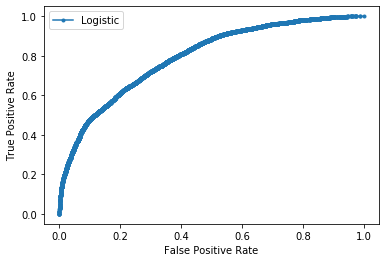

In [50]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [51]:
lr_auc = roc_auc_score(y_test, y_pred)

In [52]:
print('Logistic: ROC Area Under the Curve=%.3f' % (lr_auc))

Logistic: ROC Area Under the Curve=0.795


In [53]:
precision=precision_score(y_test, y_pred01, average='binary')

In [54]:
precision

0.7133423180592992

In [55]:
con_matrix_lg= confusion_matrix(y_test, y_pred01) 

In [56]:
con_matrix_lg

array([[5338, 2127],
       [2242, 5293]])

In [57]:
#model2 Interaction
features=[]
features=x_train.columns

In [58]:
data_train

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75,target
16268,0.0,-1.0,-1.0,-0.894052,3.323338e-04,-0.000087,0.001118,1.0,0.0,0.0,-1.0,-1.0,-0.894052,-0.505440,0.0,0.0
5504,1.0,-1.0,-1.0,-0.942626,3.278089e-03,-0.000601,-1.483455,1.0,1.0,2.0,-1.0,-1.0,-0.942626,-0.636356,1.0,0.0
23601,0.0,0.0,1.0,0.355214,-6.182356e-07,0.000000,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0
12849,0.0,0.0,-1.0,0.790438,-3.982966e-02,-0.019704,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0
18973,0.0,0.0,-1.0,-0.533846,-6.402700e-05,0.000010,-0.786113,-1.0,1.0,21.0,-1.0,1.0,0.000003,0.419223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,0.0,0.0,-1.0,-0.992932,1.823908e-04,-0.000047,-0.633371,-1.0,0.0,0.0,-1.0,1.0,0.000182,0.039015,0.0,0.0
31379,0.0,0.0,-1.0,0.000235,1.456320e-05,-0.000001,0.001118,-1.0,0.0,0.0,0.0,1.0,0.000235,0.670592,0.0,0.0
48749,0.0,0.0,1.0,0.987462,3.721650e-05,-0.000016,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0
31858,0.0,0.0,-1.0,-0.586331,-2.833520e-04,0.000003,-1.174284,0.0,0.0,0.0,-1.0,0.0,0.000000,0.000000,0.0,0.0


In [59]:
features

Index(['feat4', 'feat8', 'feat12', 'feat13', 'feat14', 'feat15', 'feat20',
       'feat31', 'feat56', 'feat63', 'feat66', 'feat69', 'feat70', 'feat71',
       'feat75'],
      dtype='object')

In [62]:
interactions = list()
for f_A in features:
     for f_B in features:
        if f_A > f_B:
            x_train['interaction'] = x_train[f_A] * x_train[f_B]
            x_test['interaction'] = x_test[f_A]* x_test[f_B]
            log.fit(x_train, y_train)
            y_pred=log.predict(x_test)
            acc=score(y_pred, y_test)
            #if acc > baseline:
            print(interactions)
            interactions.append([f_A, f_B, round(acc,4)])
            
            
            

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[]
[['feat4', 'feat12', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'fea

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'fea

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'fea

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088]]
[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['fe

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085]]
[['feat4', 'feat12', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['feat4', 'feat12', 0.7087], ['feat4', 'feat13', 0.7089], ['feat4', 'feat14', 0.7089], ['feat4', 'feat15', 0.7087], ['feat4', 'feat20', 0.7086], ['feat4', 'feat31', 0.7086], ['feat8', 'feat4', 0.7089], ['feat8', 'feat12', 0.7087], ['feat8', 'feat13', 0.7087], ['feat8', 'feat14', 0.7087], ['feat8', 'feat15', 0.7087], ['feat8', 'feat20', 0.7087], ['feat8', 'feat31', 0.7085], ['feat8', 'feat56', 0.7085], ['feat8', 'feat63', 0.7086], ['feat8', 'feat66', 0.7084], ['feat8', 'feat69', 0.7086], ['feat8', 'feat70', 0.7087], ['feat8', 'feat71', 0.709], ['feat8', 'feat75', 0.7089], ['feat13', 'feat12', 0.7089], ['feat14', 'feat12', 0.7089], ['feat14', 'feat13', 0.7084], ['feat15', 'feat12', 0.7089], ['feat15', 'feat13', 0.7088], ['feat15', 'feat14', 0.7087], ['feat20', 'feat12', 0.7087], ['feat20', 'feat13', 0.7087], ['feat20', 'feat14', 0.7087], ['feat20', 'feat15', 0.7088], ['feat31', 'feat12', 0.7083], ['feat31', 'feat13', 0.7087], ['feat31', 'feat14', 0.7085], ['feat31', 'feat15', 0.7087], [

In [63]:
interactions

[['feat4', 'feat12', 0.7087],
 ['feat4', 'feat13', 0.7089],
 ['feat4', 'feat14', 0.7089],
 ['feat4', 'feat15', 0.7087],
 ['feat4', 'feat20', 0.7086],
 ['feat4', 'feat31', 0.7086],
 ['feat8', 'feat4', 0.7089],
 ['feat8', 'feat12', 0.7087],
 ['feat8', 'feat13', 0.7087],
 ['feat8', 'feat14', 0.7087],
 ['feat8', 'feat15', 0.7087],
 ['feat8', 'feat20', 0.7087],
 ['feat8', 'feat31', 0.7085],
 ['feat8', 'feat56', 0.7085],
 ['feat8', 'feat63', 0.7086],
 ['feat8', 'feat66', 0.7084],
 ['feat8', 'feat69', 0.7086],
 ['feat8', 'feat70', 0.7087],
 ['feat8', 'feat71', 0.709],
 ['feat8', 'feat75', 0.7089],
 ['feat13', 'feat12', 0.7089],
 ['feat14', 'feat12', 0.7089],
 ['feat14', 'feat13', 0.7084],
 ['feat15', 'feat12', 0.7089],
 ['feat15', 'feat13', 0.7088],
 ['feat15', 'feat14', 0.7087],
 ['feat20', 'feat12', 0.7087],
 ['feat20', 'feat13', 0.7087],
 ['feat20', 'feat14', 0.7087],
 ['feat20', 'feat15', 0.7088],
 ['feat31', 'feat12', 0.7083],
 ['feat31', 'feat13', 0.7087],
 ['feat31', 'feat14', 0.7085],

In [64]:
newdf = pd.DataFrame(interactions)

In [65]:
newdf.sort_values(by=[2], ascending = False)

,0,1,2
52,feat66,feat13,0.7095
49,feat63,feat56,0.7093
87,feat71,feat56,0.7093
90,feat71,feat69,0.7092
18,feat8,feat71,0.7090
...,...,...,...
64,feat69,feat20,0.7082
81,feat71,feat12,0.7082
43,feat63,feat12,0.7079
68,feat69,feat66,0.7079


In [66]:
x_train['newcol1'] = x_train['feat66'] * x_train['feat12']
x_train['newcol2'] = x_train['feat71'] * x_train['feat31']
x_train['newcol3'] = x_train['feat69'] * x_train['feat56']
x_train['newcol4'] = x_train['feat66'] * x_train['feat14']
x_train['newcol5'] = x_train['feat71'] * x_train['feat13']

In [67]:
x_test['newcol1'] = x_test['feat66'] * x_test['feat12']
x_test['newcol2'] = x_test['feat71'] * x_test['feat31']
x_test['newcol3'] = x_test['feat69'] * x_test['feat56']
x_test['newcol4'] = x_test['feat66'] * x_test['feat14']
x_test['newcol5'] = x_test['feat71'] * x_test['feat13']

In [68]:
x_train

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,...,feat69,feat70,feat71,feat75,interaction,newcol1,newcol2,newcol3,newcol4,newcol5
16268,0.0,-1.0,-1.0,-0.894052,3.323338e-04,-0.000087,0.001118,1.0,0.0,0.0,...,-1.0,-0.894052,-0.505440,0.0,-0.000000,1.0,-0.505440,-0.0,-3.323338e-04,0.451890
5504,1.0,-1.0,-1.0,-0.942626,3.278089e-03,-0.000601,-1.483455,1.0,1.0,2.0,...,-1.0,-0.942626,-0.636356,1.0,-0.636356,1.0,-0.636356,-1.0,-3.278089e-03,0.599846
23601,0.0,0.0,1.0,0.355214,-6.182356e-07,0.000000,0.001118,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,-6.182356e-07,0.000000
12849,0.0,0.0,-1.0,0.790438,-3.982966e-02,-0.019704,0.001118,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,-1.0,0.000000,0.0,-3.982966e-02,0.000000
18973,0.0,0.0,-1.0,-0.533846,-6.402700e-05,0.000010,-0.786113,-1.0,1.0,21.0,...,1.0,0.000003,0.419223,0.0,0.000000,1.0,-0.419223,1.0,6.402700e-05,-0.223801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,0.0,0.0,-1.0,-0.992932,1.823908e-04,-0.000047,-0.633371,-1.0,0.0,0.0,...,1.0,0.000182,0.039015,0.0,0.000000,1.0,-0.039015,0.0,-1.823908e-04,-0.038739
31379,0.0,0.0,-1.0,0.000235,1.456320e-05,-0.000001,0.001118,-1.0,0.0,0.0,...,1.0,0.000235,0.670592,0.0,0.000000,-0.0,-0.670592,0.0,0.000000e+00,0.000157
48749,0.0,0.0,1.0,0.987462,3.721650e-05,-0.000016,0.001118,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,3.721650e-05,0.000000
31858,0.0,0.0,-1.0,-0.586331,-2.833520e-04,0.000003,-1.174284,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,2.833520e-04,-0.000000


In [69]:
x_train.drop(['interaction'],axis=1, inplace=True)

In [70]:
x_test.drop(['interaction'],axis=1, inplace=True)


In [71]:
x_test

,feat4,feat8,feat12,feat13,feat14,feat15,feat20,feat31,feat56,feat63,feat66,feat69,feat70,feat71,feat75,newcol1,newcol2,newcol3,newcol4,newcol5
1189,-1.0,0.0,1.0,-0.433954,0.000825,0.000083,0.001118,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0.0,0.000825,-0.000000
24510,0.0,0.0,1.0,0.249425,0.108979,-0.000001,1.076755,-1.0,-1.0,-2.0,1.0,1.0,0.249425,0.847118,0.0,1.0,-0.847118,-1.0,0.108979,0.211292
32049,0.0,0.0,-1.0,0.000595,0.000470,-0.000030,0.001118,1.0,0.0,0.0,0.0,-1.0,-0.000030,-0.750404,0.0,-0.0,-0.750404,-0.0,0.000000,-0.000447
38591,0.0,0.0,-1.0,-0.000530,-0.000001,0.000001,0.001118,-1.0,0.0,0.0,0.0,1.0,0.000001,0.648040,0.0,-0.0,-0.648040,0.0,-0.000000,-0.000343
38779,0.0,0.0,-1.0,0.987759,0.004180,-0.000116,0.598041,-1.0,-1.0,-6.0,1.0,1.0,0.987759,0.003810,0.0,-1.0,-0.003810,-1.0,0.004180,0.003764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37482,1.0,0.0,1.0,0.000368,0.000230,0.000000,1.125020,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000
7917,-1.0,0.0,1.0,0.989560,-0.967907,0.531314,0.531858,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0.0,-0.967907,0.000000
235,0.0,0.0,-1.0,-0.013672,0.000082,0.000015,-0.511742,1.0,1.0,0.0,1.0,-1.0,-0.000010,-0.000754,0.0,-1.0,-0.000754,-1.0,0.000082,0.000010
34150,0.0,0.0,-1.0,0.000294,-0.000182,-0.000072,0.001118,1.0,0.0,0.0,-1.0,1.0,0.000294,0.393881,0.0,1.0,0.393881,0.0,0.000182,0.000116


In [72]:
log_interaction = LogisticRegression()
log_interaction.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
inter_pred01=log_interaction.predict(x_test)

In [74]:
inter_pred01

array([0., 1., 0., ..., 0., 0., 0.])

In [75]:
inter_pred=log_interaction.predict_proba(x_test)

In [76]:
inter_pred=inter_pred[:,1]

In [77]:
inter_pred

array([0.43150403, 0.84647208, 0.36713646, ..., 0.47419132, 0.4553541 ,
       0.03329415])

In [78]:
inter_acc= score(inter_pred, y_test)
inter_acc

0.8161040812321374

In [123]:
LGI_auc = roc_auc_score(y_test,inter_pred)

In [124]:
print(' with interactionLogistic regression: ROC Area Under the Curve=%.3f' % (LGI_auc))

 with interactionLogistic regression: ROC Area Under the Curve=0.795


In [79]:
precision_inter=precision_score(y_test, inter_pred01, average='binary')

In [80]:
precision_inter

0.7145754461871282

In [81]:
in_fpr, in_tpr, _ = roc_curve(y_test,inter_pred)

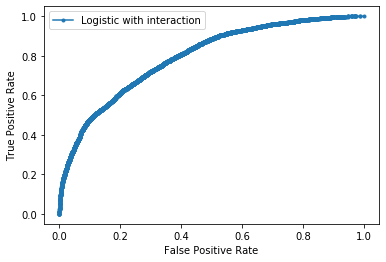

In [82]:
pyplot.plot(in_fpr, in_tpr, marker='.', label='Logistic with interaction')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [83]:
con_matrix_in= confusion_matrix(y_test, inter_pred01)

In [84]:
con_matrix_in

array([[5354, 2111],
       [2250, 5285]])

In [85]:
# model 3 Random Forest

In [86]:
data

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,-1.0,-0.036906,-0.000724,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2.0,0.0,0.920167,0.817883,-0.646473,-1.0,0.000000,0.0,0.000000,0.0,...,-1.0,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1.0,1.0,0.302235,0.950770
2,3.0,1.0,0.868397,0.178202,0.150828,-1.0,0.000000,0.0,0.000000,0.0,...,1.0,0.908824,0.550843,0.868397,0.178202,0.150828,-1.0,1.0,0.001421,0.882853
3,4.0,0.0,0.000000,0.000000,0.000000,0.0,1.577894,0.0,-0.369792,-1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,5.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.000005,0.400702,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
49996,49997.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
49997,49998.0,1.0,0.918590,1.012605,-0.047045,-1.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1.0,1.0,0.014583,0.850662
49998,49999.0,1.0,0.000000,0.000000,0.000000,0.0,0.855551,0.0,-0.849437,1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [87]:
data.drop(['exampleid'], axis = 1,inplace=True)

In [88]:
data_trainT, data_valT = train_test_split(data, test_size = 0.3)

In [89]:
x_trainT = data_trainT.iloc[:, data_trainT.columns!='target']
y_trainT =data_trainT.target
x_testT = data_valT.iloc[:, data_valT.columns!='target']
y_testT= data_valT.target

In [90]:
y_testT.shape

(15000,)

In [91]:
RF_Model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [92]:
RF_Model.fit(x_trainT, y_trainT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
y_testT

21075    1.0
43212    1.0
40540    1.0
11021    0.0
43717    0.0
        ... 
7249     0.0
40386    0.0
46572    0.0
42609    1.0
42898    0.0
Name: target, Length: 15000, dtype: float64

In [94]:
pred= RF_Model.predict_proba(x_testT)

In [95]:
pred01=RF_Model.predict(x_testT)

In [96]:
pred01

array([0., 1., 1., ..., 0., 1., 0.])

In [97]:
pred=pred[:,1]

In [98]:
pred

array([0.26, 0.77, 0.54, ..., 0.18, 0.7 , 0.42])

In [99]:
falsepr, truepr, _ = roc_curve(y_testT,pred)

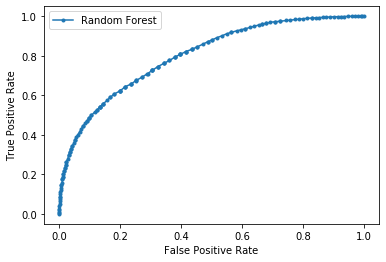

In [100]:
pyplot.plot(falsepr, truepr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [101]:
RF_auc = roc_auc_score(y_testT,pred)

In [102]:
print('Random Forest: ROC Area Under the Curve=%.3f' % (RF_auc))

Random Forest: ROC Area Under the Curve=0.802


In [103]:
precisionRF=precision_score(y_testT, pred01, average='binary')

In [104]:
precisionRF

0.7169627984453082

In [105]:
con_matrix_rf= confusion_matrix(y_test,pred01) 

In [106]:
con_matrix_rf

array([[3823, 3642],
       [3973, 3562]])

In [107]:
score(pred,y_testT)

0.8190255866741323

In [108]:
#gradient Boosting
gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_trainT, y_trainT)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
predGB01= gb.predict(x_testT);

In [110]:
predGB= gb.predict_proba(x_testT);

In [111]:
predGB=predGB[:,1]

In [112]:
predGB

array([0.41209589, 0.76406075, 0.63147009, ..., 0.06618965, 0.8188713 ,
       0.43253191])

In [113]:
predGB01

array([0., 1., 1., ..., 0., 1., 0.])

In [114]:
fp, tp, _ = roc_curve(y_testT,predGB)

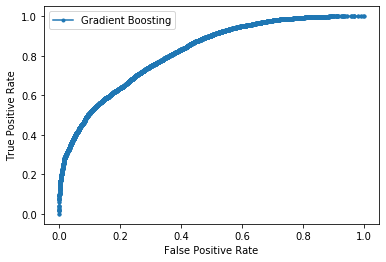

In [115]:
pyplot.plot(fp, tp, marker='.', label='Gradient Boosting')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [116]:
con_matrix_gb= confusion_matrix(y_test,predGB01) 

In [117]:
con_matrix_gb

array([[3865, 3600],
       [3969, 3566]])

In [121]:
GB_auc = roc_auc_score(y_testT,predGB)

In [122]:
print('Gradient Boosting: ROC Area Under the Curve=%.3f' % (GB_auc))

Gradient Boosting: ROC Area Under the Curve=0.818


In [118]:
precisionGB=precision_score(y_testT, predGB01, average='binary')

In [119]:
precisionGB

0.7329053865475859

In [120]:
score(predGB,y_testT)

0.826636911172325